In [32]:
import numpy as np
import matplotlib.pyplot as plt

$$
\frac{df(x)}{dx} \approx \frac{\Delta f(x)}{\Delta x} =  \frac{f(x + \Delta x) - f(x)}{\Delta x} 
$$


For a time step $ \Delta t $, the discrete-time approximation of the GBM SDE in matrix form is:

$$
\mathbf{X}_{t+\Delta t} \approx \mathbf{X}_t  ( 1 + \boldsymbol{\mu}  \Delta t + \boldsymbol{\sigma}  \Delta W_{t})
$$

$$
\mathbf{X}_{0} = c
$$

$$
\Delta W_{t} = W_{t+1} - W_{t} = \sqrt{\Delta t} Z
$$

$$
W_{t+1} = W_{t} + \sqrt{\Delta t} Z
$$

$$
Z \sim N(0,1)
$$



In [33]:
X0 = 100          # Initial value
mu = 0.05         # Drift (5% annual return)
sigma = 0.2       # Volatility (20% annual volatility)
T = 1.0           # Time horizon (1 year)
N = 252           # Number of time steps (daily steps)
dt = T / N        # Time step size


In [34]:
# Initialize arrays
t = np.linspace(0, T, N)  # Time points
X = np.zeros(N)           # Array to store process values
X[0] = X0                 # Initial value

# Generate the GBM path
for i in range(1, N):
    Z = np.random.normal(0, 1)       # Standard normal random variable
    X[i] = X[i-1] * (1 + mu * dt + sigma * np.sqrt(dt) * Z)

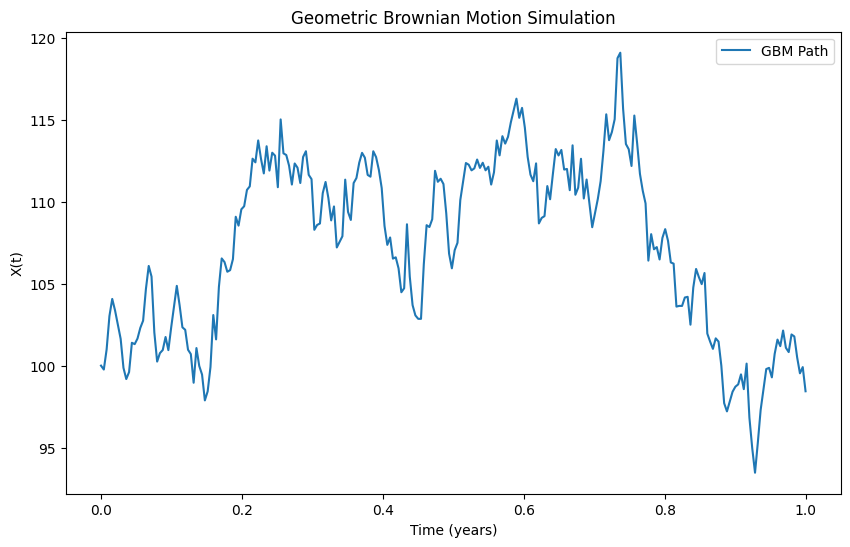

In [35]:
plt.figure(figsize=(10, 6))
plt.plot(t, X, label="GBM Path")
plt.xlabel("Time (years)")
plt.ylabel("X(t)")
plt.title("Geometric Brownian Motion Simulation")
plt.legend()
plt.show()

For a time step $ \Delta t $, the discrete-time approximation of the 2D Wiener process is:
$$
A' = Cholesky(A)
$$
Then W is corrleated according to A
$$
\mathbf{W}_{t+\Delta t} \approx \mathbf{W}_t  + \mathbf{A'}\mathbf{Z} 
$$

$$
\mathbf{Z} \sim N(0, I_{2})
$$


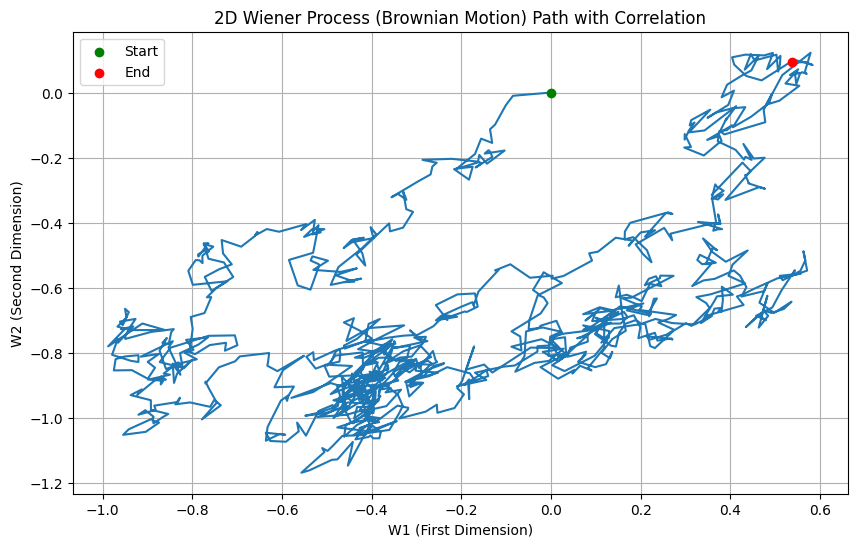

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
T = 1.0                   # Total time (1 year)
N = 1000                  # Number of time steps
dt = T / N                # Time step size
rho = 0.5                 # Correlation coefficient between the processes

# Define the covariance matrix and its Cholesky decomposition
cov_matrix = np.array([[1, rho], [rho, 1]])
A = np.linalg.cholesky(cov_matrix)  # Cholesky decomposition of the covariance matrix

# Initialize the Wiener process
W = np.zeros((N, 2))  # Array to store the 2D Wiener process

# Simulate the 2D Wiener process with correlated increments
for t in range(1, N):
    Z = np.random.normal(0, 1, 2)     # Independent standard normal variables
    dW = np.sqrt(dt) * A @ Z          # Correlated increment using A and Z
    W[t] = W[t-1] + dW                # Update Wiener process at time t

# Plot the 2D Wiener process path
plt.figure(figsize=(10, 6))
plt.plot(W[:, 0], W[:, 1], lw=1.5)
plt.scatter(W[0, 0], W[0, 1], color='green', label='Start', zorder=5)
plt.scatter(W[-1, 0], W[-1, 1], color='red', label='End', zorder=5)
plt.title("2D Wiener Process (Brownian Motion) Path with Correlation")
plt.xlabel("W1 (First Dimension)")
plt.ylabel("W2 (Second Dimension)")
plt.legend()
plt.grid(True)
plt.show()

For a time step $ \Delta t $, the discrete-time approximation of the 2D GBM SDE in matrix form is:

$$
\mathbf{X}_{t+\Delta t} \approx \mathbf{X}_t \circ \left( \mathbf{1} + \boldsymbol{\mu} \, \Delta t + \boldsymbol{\sigma} \, \mathbf{A} \, \Delta \mathbf{W}_t \right),
$$

$$
\Delta \mathbf{W}_{t} = \mathbf{W}_{t+1} - \mathbf{W}_{t} = \mathbf{A} \mathbf{Z} \sqrt{\Delta t}
$$

$$
 \mathbf{W}_{t+1} \approx \mathbf{W}_{t} + \mathbf{A} \mathbf{Z} \sqrt{\Delta t}
$$

$$
\mathbf{Z} \sim N(0, I_{2})
$$



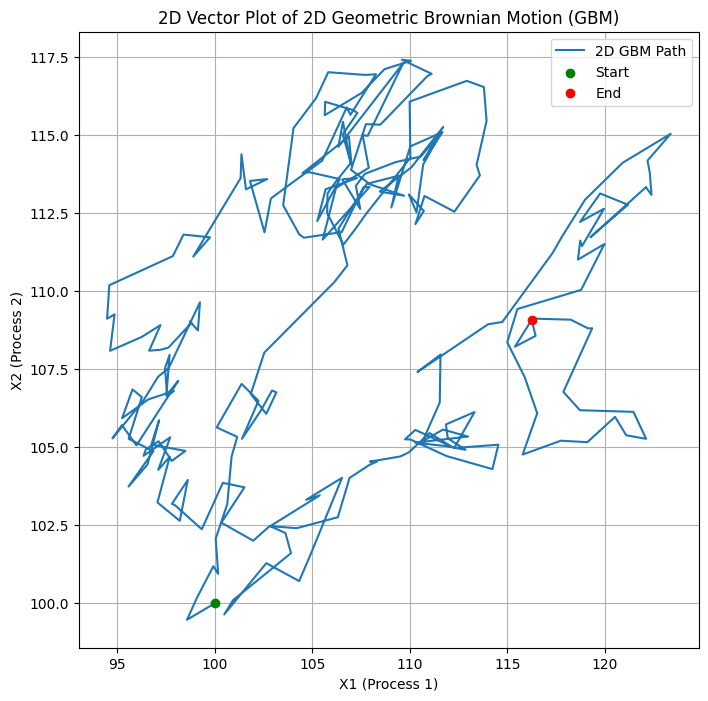

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for 2D GBM
T = 1.0                 # Total time (1 year)
N = 252                 # Number of time steps (daily steps)
dt = T / N              # Time step size
mu = np.array([0.05, 0.03])  # Drift for each dimension
sigma = np.array([0.2, 0.15]) # Volatility for each dimension
rho = 0.5               # Correlation coefficient between the processes
X0 = np.array([100, 100])     # Initial values for each process

# Cholesky decomposition matrix for correlation
A = np.array([[1, 0], [rho, np.sqrt(1 - rho**2)]])

# Initialize arrays to store the paths
X = np.zeros((N, 2))
X[0] = X0

# Simulate the 2D GBM path using a for loop
for t in range(1, N):
    Z = np.random.normal(0, 1, 2)  # Independent standard normal variables
    dW = A @ Z * np.sqrt(dt)       # Correlated Wiener increments
    X[t] = X[t-1] * (1 + mu * dt + sigma * dW)  # Update GBM

# Plot the 2D GBM paths as a 2D vector plot
plt.figure(figsize=(8, 8))
plt.plot(X[:, 0], X[:, 1], lw=1.5, label="2D GBM Path")
plt.scatter(X[0, 0], X[0, 1], color='green', label='Start', zorder=5)  # Starting point
plt.scatter(X[-1, 0], X[-1, 1], color='red', label='End', zorder=5)    # Ending point
plt.xlabel("X1 (Process 1)")
plt.ylabel("X2 (Process 2)")
plt.title("2D Vector Plot of 2D Geometric Brownian Motion (GBM)")
plt.legend()
plt.grid(True)
plt.show()


To approximate the Itô integral

$$
Y_t(B) = \int_0^t B_s \, dB_s,
$$

we use a **discrete approximation** with a partition of the interval $[0, t]$ into $N$ subintervals of equal length $\Delta t = \frac{t}{N}$.

### Discrete Approximation of $Y_t(B)$

In discrete time, we approximate $Y_t(B)$ as

$$
Y_t(B) \approx \sum_{i=1}^{N} B_{t_{i-1}} \cdot \Delta B_{t_i},
$$

where:
- $\Delta B_{t_i} = B_{t_i} - B_{t_{i-1}} = \sqrt{\Delta t} Z$ with $Z \sim N(0,1)$ represents the increment of the Brownian motion over the interval $[t_{i-1}, t_i]$,
- $B_{t_{i-1}}$ is the value of $B$ at the start of each interval, consistent with the Itô interpretation of stochastic integrals.

### Exact Solution

For this particular integral, we can find an exact solution using Itô’s Lemma, which tells us that

$$
Y_t(B) = \frac{B_t^2 - t}{2}.
$$

This provides an analytical result for the integral $\int_0^t B_s \, dB_s$, where:
- $B_t^2$ is the square of the Brownian motion at time $t$,
- $t$ represents the length of the time interval.


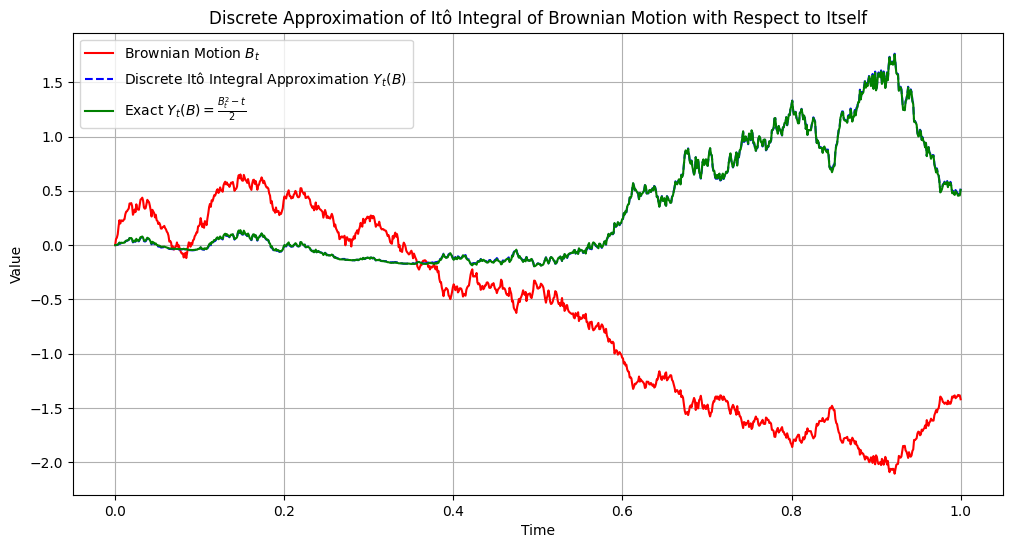

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
T = 1.0                # Total time
N = 1000               # Number of steps
dt = T / N             # Time step size
t = np.linspace(0, T, N)  # Time grid

# Simulate Brownian motion B_t
np.random.seed(0)
dB = np.sqrt(dt) * np.random.normal(0, 1, N-1)  # Brownian increments
B = np.concatenate(([0], np.cumsum(dB)))        # Cumulative sum for B_t

# Approximate Y_t(B) as the sum of B(t_{i-1}) * dB(t_i)
Y_discrete = np.zeros(N)
for i in range(1, N):
    Y_discrete[i] = Y_discrete[i-1] + B[i-1] * dB[i-1]

# Calculate the exact solution Y_t(B) = (B_t^2 - t) / 2 for comparison
Y_exact = (B**2 - t) / 2

# Plot Brownian motion, discrete Itô integral, and exact solution
plt.figure(figsize=(12, 6))
plt.plot(t, B, color="red", label="Brownian Motion $B_t$")
plt.plot(t, Y_discrete, color="blue", linestyle="--", linewidth=2, label="Discrete Itô Integral Approximation $Y_t(B)$")
plt.plot(t, Y_exact, color="green", linestyle=":", linewidth=2, alpha=0.6, label="Exact $Y_t(B) = \\frac{B_t^2 - t}{2}$")
plt.xlabel("Time")
plt.ylabel("Value")
plt.title("Discrete Approximation of Itô Integral of Brownian Motion with Respect to Itself")
plt.legend()
plt.grid(True)
plt.show()
